<a href="https://colab.research.google.com/github/Dinith-Thejana/Assignment_2B/blob/main/models/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploads = files.upload()

Saving traffic_cleaned.csv to traffic_cleaned.csv


In [2]:
import pandas as pd

In [8]:
df = pd.read_csv('traffic_cleaned.csv')
df.head(10)


,SCATS Number,Location,Date,Interval,Volume,Time,DateTime
0,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-01,V00,86,00:00,2006-10-01 00:00:00
1,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-02,V00,32,00:00,2006-10-02 00:00:00
2,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-03,V00,26,00:00,2006-10-03 00:00:00
3,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-04,V00,32,00:00,2006-10-04 00:00:00
4,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-05,V00,40,00:00,2006-10-05 00:00:00
5,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-06,V00,36,00:00,2006-10-06 00:00:00
6,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-07,V00,62,00:00,2006-10-07 00:00:00
7,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-08,V00,116,00:00,2006-10-08 00:00:00
8,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-09,V00,23,00:00,2006-10-09 00:00:00
9,970,WARRIGAL_RD N of HIGH STREET_RD,2006-10-10,V00,27,00:00,2006-10-10 00:00:00


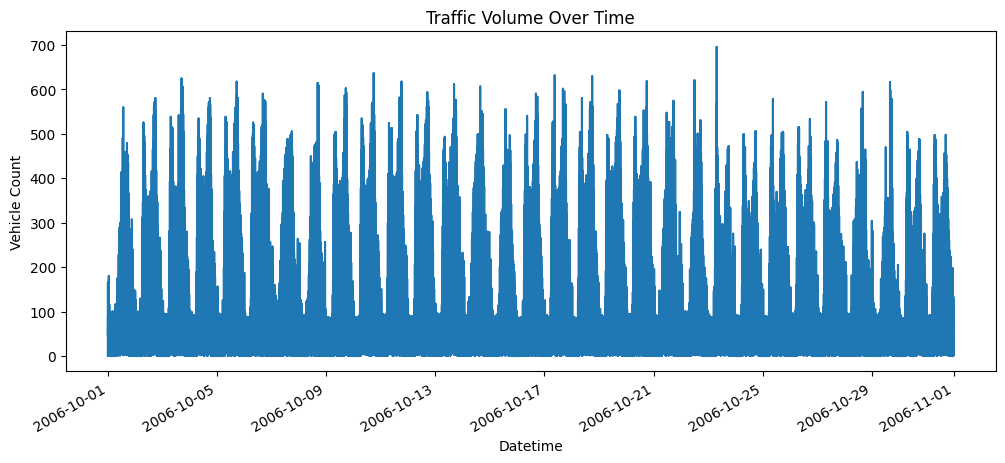

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

df = pd.read_csv('traffic_cleaned.csv')

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.sort_values('Datetime')

df.set_index('Datetime', inplace=True)

df['Volume'].plot(figsize=(12,5), title="Traffic Volume Over Time")
plt.ylabel("Vehicle Count")
plt.show()


In [10]:
data = df[['Volume']].values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, window_size=24):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 24
X, y = create_sequences(scaled_data, window_size)


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [11]:

model = Sequential()
model.add(LSTM(units=64, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
9055/9055 ━━━━━━━━━━━━━━━━━━━━ 125s 14ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 2/20
9055/9055 ━━━━━━━━━━━━━━━━━━━━ 123s 14ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 3/20
9055/9055 ━━━━━━━━━━━━━━━━━━━━ 147s 14ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 4/20
9055/9055 ━━━━━━━━━━━━━━━━━━━━ 141s 14ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 5/20
9055/9055 ━━━━━━━━━━━━━━━━━━━━ 143s 14ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 6/20
9055/9055 ━━━━━━━━━━━━━━━━━━━━ 134s 13ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 7/20
9055/9055 ━━━━━━━━━━━━━━━━━━━━ 141s 13ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 8/20
9055/9055 ━━━━━━━━━━━━━━━━━━━━ 143s 13ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 9/20
9055/9055 ━━━━━━━━━━━━━━━━━━━━ 121s 13ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 10/20
9055/9055 ━━━━━━━━━━━━━━━━━━━━ 141s 13ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 11/20
9055/9055 ━━━━━━━━━━━━━━━━━━━━ 143s 13ms/step - loss: 0.0065 - val_loss: 0.00

2516/2516 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step


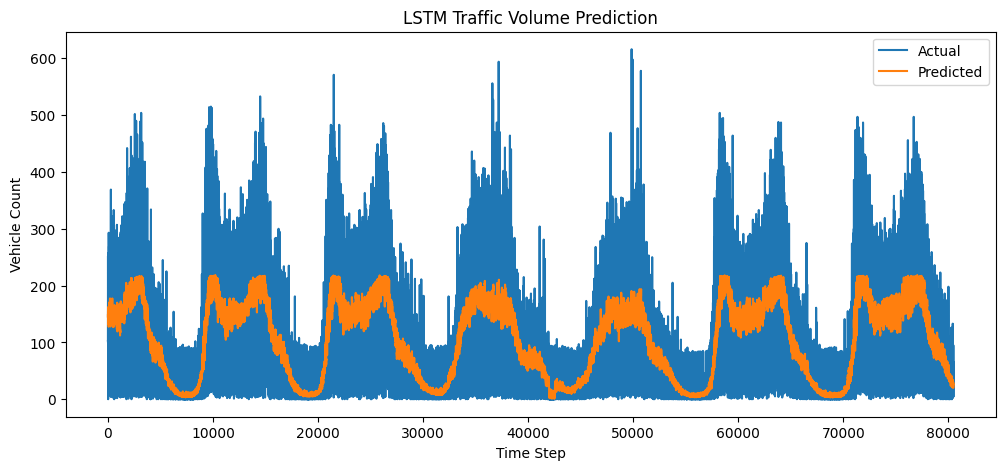

In [12]:
predictions = model.predict(X_test)
predicted_volumes = scaler.inverse_transform(predictions)
actual_volumes = scaler.inverse_transform(y_test)

plt.figure(figsize=(12,5))
plt.plot(actual_volumes, label='Actual')
plt.plot(predicted_volumes, label='Predicted')
plt.title("LSTM Traffic Volume Prediction")
plt.xlabel("Time Step")
plt.ylabel("Vehicle Count")
plt.legend()
plt.show()


In [13]:

model.save("lstm_traffic_model.h5")
